<a href="https://colab.research.google.com/github/Mrrobi/Machine-Learning/blob/master/nameless/Mnist%20NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import tensorflow as tf
from keras.datasets import mnist
# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [55]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# imports for array-handling and plotting
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

In [56]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


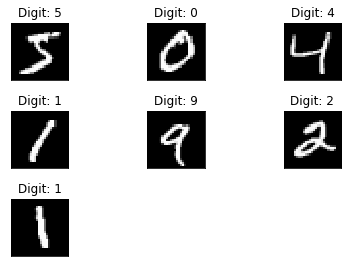

In [57]:
fig = plt.figure()
for i in range(7):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [58]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# normalizing the data to help with the training
X_train /= 255
X_test /= 255

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [59]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [60]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(10, activation='softmax')
])

In [61]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Epoch 1/20
469/469 - 2s - loss: 0.2466 - accuracy: 0.9279 - val_loss: 0.1256 - val_accuracy: 0.9596
Epoch 2/20
469/469 - 1s - loss: 0.0928 - accuracy: 0.9722 - val_loss: 0.0847 - val_accuracy: 0.9735
Epoch 3/20
469/469 - 1s - loss: 0.0638 - accuracy: 0.9796 - val_loss: 0.0824 - val_accuracy: 0.9740
Epoch 4/20
469/469 - 1s - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0899 - val_accuracy: 0.9741
Epoch 5/20
469/469 - 1s - loss: 0.0411 - accuracy: 0.9870 - val_loss: 0.0793 - val_accuracy: 0.9761
Epoch 6/20
469/469 - 1s - loss: 0.0316 - accuracy: 0.9903 - val_loss: 0.1110 - val_accuracy: 0.9699
Epoch 7/20
469/469 - 1s - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0890 - val_accuracy: 0.9764
Epoch 8/20
469/469 - 1s - loss: 0.0276 - accuracy: 0.9907 - val_loss: 0.0979 - val_accuracy: 0.9766
Epoch 9/20
469/469 - 1s - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0770 - val_accuracy: 0.9823
Epoch 10/20
469/469 - 1s - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0886 - val_accuracy: 0.9786

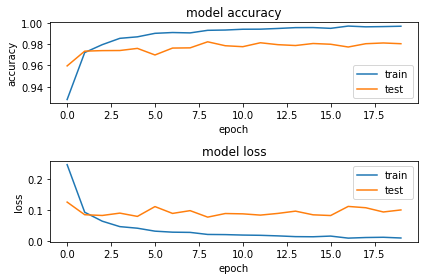

In [62]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/content/sample_data"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig